#Packages and libraries

The required packages and libraries are installed.

In [1]:
pip install -q -U google-generativeai pdfminer.six nltk gensim sumy transformers bert-extractive-summarizer wordcloud matplotlib pillow python-docx rouge_score bert-score

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.6 MB/s eta 0:00:00


In [2]:
from pdfminer.high_level import extract_text

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize.treebank import TreebankWordDetokenizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Download for wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('stopwords')


from transformers import pipeline
import re
from summarizer import Summarizer

#bart library
from transformers import BartForConditionalGeneration, BartTokenizer

#t5 transformer
from transformers import T5ForConditionalGeneration, T5Tokenizer

#generative ai - gemini libraries
import google.generativeai as genai
import os
from typing_extensions import TypedDict
from google.colab import userdata
import json


import docx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Used to securely store your API key

GOOGLE_API_KEY=userdata.get('API_GEMINI')

genai.configure(api_key=GOOGLE_API_KEY)

#Extract text from PDF

The fucntion to read the PDF and extract the text from the PDF

In [4]:
# Function to extract text from PDF using PDFMiner
def extract_text_from_pdf(pdf_path):
    return extract_text(pdf_path)

In [137]:
pdf_path = "/content/jefp101.pdf"
raw_text = extract_text_from_pdf(pdf_path)
print(raw_text[:1000])

1

A Triumph of Surgery

Tricki, a small dog, is pampered and overfed
by his rich mistress. He falls seriously ill and
his mistress consults a veterinary surgeon. Does
he perform an operation? Does the dog recover?

READ AND FIND OUT
• Why is Mrs Pumphrey worried about Tricki?
• What does she do to help him? Is she wise in this?
• Who does ‘I’ refer to in this story?

I  WAS  really  worried  about  Tricki  this  time.  I  had  pulled  up  my  car
when  I  saw  him  in  the  street  with  his  mistress  and  I  was  shocked  at
his appearance. He had become hugely fat, like a bloated sausage with
a  leg  at  each  corner.  His  eyes,  bloodshot  and  rheumy,  stared  straight
ahead  and  his  tongue  lolled  from  his  jaws.

Mrs Pumphrey hastened to explain, “He was so listless, Mr Herriot.
He  seemed  to  have  no  energy.  I  thought  he  must  be  suffering  from
malnutrition,  so  I  have  been  giving  him  some  little  extras  between
meals  to  build  him  up,  some  malt  and

In [ ]:
# #This pattern for chapter 8

# def preprocess_chap8(raw_text):
#   pattern = r'^.*?(\d+).*?READ AND FIND OUT'

#   # Search for the pattern and get the match
#   match = re.search(pattern, raw_text, re.DOTALL)

#   if match:
#       # Extract the first occurrence of the number
#       number_before_read = match.group(1)
#       # Remove everything before the number and the "READ AND FIND OUT" section
#       cleaned_text = re.sub(pattern, number_before_read, raw_text, flags=re.DOTALL)
#   else:
#       cleaned_text = raw_text

#   return cleaned_text

# cleaned_text = preprocess_chap8(raw_text)

# # print("First number before 'READ AND FIND OUT':", number_before_read)
# print("Cleaned Text:\n", cleaned_text)

#Preprocessing and text cleanup

Function to get the title of the chapter

In [138]:
def get_title(text):
    # First, extract text up to the first occurrence of a number, including possible newlines
    match_number = re.search(r"^(.*?)(?=\n*\d)", text, re.DOTALL)

    if match_number:
        # Extracted text before the number
        text_till_number = match_number.group(1).strip()

        # Extract the first meaningful line from the text before the number
        match_title = re.search(r"(.*?)\n", text_till_number, re.DOTALL)

        if match_title:
            return match_title.group(1).strip()  # Extract the first line as the title
        else:
            return text_till_number  # Return all text till the number if no line match

    else:
        # If no number is found, apply fallback logic to look for a title pattern
        title = re.search(r"\d+\s*\n\n(.*?)\n", text, re.DOTALL)
        if title:
            return title.group(1).strip()
        else:
            return None

title = get_title(raw_text)
print(title)

The below functions are used for removal of page numbers, page headers and footers.

In [9]:
def preprocess_text(text):
  processed_text = re.sub(r'Reprint 2024-25|\d|\d+\s+Footprints without Feet|Footprints without Feet|A Triumph of Surgery\s\d|READ AND FIND OUT[\s\S]*?(?:•\s.*\n)+', '', text)

  # Replace multiple spaces with a single space
  processed_text = re.sub(r'\s+', ' ', processed_text)

  # Strip leading and trailing whitespace
  processed_text = processed_text.strip()
  return processed_text

cleaned_text = preprocess_text(raw_text)
print(cleaned_text)

A Triumph of Surgery Tricki, a small dog, is pampered and overfed by his rich mistress. He falls seriously ill and his mistress consults a veterinary surgeon. Does he perform an operation? Does the dog recover? I WAS really worried about Tricki this time. I had pulled up my car when I saw him in the street with his mistress and I was shocked at his appearance. He had become hugely fat, like a bloated sausage with a leg at each corner. His eyes, bloodshot and rheumy, stared straight ahead and his tongue lolled from his jaws. Mrs Pumphrey hastened to explain, “He was so listless, Mr Herriot. He seemed to have no energy. I thought he must be suffering from malnutrition, so I have been giving him some little extras between meals to build him up, some malt and cod-liver oil and a bowl of Horlicks at night to make him sleep — nothing much really.” “And did you cut down on the sweet things as I told you?” “Oh, I did for a bit, but he seemed to be so weak I had to relent. He does love cream ca

In [10]:
# title='Bholi'

In [11]:
def remove_subsequent_occurrences(text, phrase):
    parts = text.split(phrase)
    return phrase + parts[1] + "".join(parts[2:])

cleaned_text = remove_subsequent_occurrences(cleaned_text, title)

print(cleaned_text)

A Triumph of Surgery Tricki, a small dog, is pampered and overfed by his rich mistress. He falls seriously ill and his mistress consults a veterinary surgeon. Does he perform an operation? Does the dog recover? I WAS really worried about Tricki this time. I had pulled up my car when I saw him in the street with his mistress and I was shocked at his appearance. He had become hugely fat, like a bloated sausage with a leg at each corner. His eyes, bloodshot and rheumy, stared straight ahead and his tongue lolled from his jaws. Mrs Pumphrey hastened to explain, “He was so listless, Mr Herriot. He seemed to have no energy. I thought he must be suffering from malnutrition, so I have been giving him some little extras between meals to build him up, some malt and cod-liver oil and a bowl of Horlicks at night to make him sleep — nothing much really.” “And did you cut down on the sweet things as I told you?” “Oh, I did for a bit, but he seemed to be so weak I had to relent. He does love cream ca

Get the separate sections from the chapter such as Main content, gloassary, think about it, talk about it and suggested reading.

In [12]:
def separate_sections(text):
  # Define the regex patterns to extract the sections
  glossary_pattern = re.compile(r'GLOSSARY(.*?)Think about it', re.DOTALL)
  think_about_it_pattern = re.compile(r'Think about it(.*?)Talk about it', re.DOTALL)
  talk_about_it_pattern = re.compile(r'Talk about it(.*?)Suggested reading', re.DOTALL)
  suggested_reading_pattern = re.compile(r'Suggested reading(.*)', re.DOTALL)


  # Extract the sections using the patterns
  main_content = re.split(r'GLOSSARY|Think about it|Talk about it|Suggested reading', text)[0].strip()
  glossary = glossary_pattern.search(text)
  think_about_it = think_about_it_pattern.search(text)
  talk_about_it = talk_about_it_pattern.search(text)
  suggested_reading = suggested_reading_pattern.search(text)

  glossary = glossary.group(1).strip() if glossary else ''
  think_about_it = think_about_it.group(1).strip() if think_about_it else ''
  talk_about_it = talk_about_it.group(1).strip() if talk_about_it else ''
  suggested_reading = suggested_reading.group(1).strip() if suggested_reading else ''

  # Return the extracted sections
  return main_content, glossary, think_about_it, talk_about_it, suggested_reading

In [13]:
main_content, glossary, think_about_it, talk_about_it, suggested_reading = separate_sections(cleaned_text)

main_content = re.sub(title, '', main_content)
print("Main Content:")
print(main_content)

Main Content:
 Tricki, a small dog, is pampered and overfed by his rich mistress. He falls seriously ill and his mistress consults a veterinary surgeon. Does he perform an operation? Does the dog recover? I WAS really worried about Tricki this time. I had pulled up my car when I saw him in the street with his mistress and I was shocked at his appearance. He had become hugely fat, like a bloated sausage with a leg at each corner. His eyes, bloodshot and rheumy, stared straight ahead and his tongue lolled from his jaws. Mrs Pumphrey hastened to explain, “He was so listless, Mr Herriot. He seemed to have no energy. I thought he must be suffering from malnutrition, so I have been giving him some little extras between meals to build him up, some malt and cod-liver oil and a bowl of Horlicks at night to make him sleep — nothing much really.” “And did you cut down on the sweet things as I told you?” “Oh, I did for a bit, but he seemed to be so weak I had to relent. He does love cream cakes an

In [14]:
len(main_content)

8447

In [15]:
number_of_words = len(main_content.split())
print(number_of_words)

1580


In [16]:
# def save_text_to_file(text, file_path):
#     with open(file_path, 'w') as file:
#         file.write(text)

# # File path to save the summary
# summary_file_path = "main_content.txt"
# save_text_to_file(main_content, summary_file_path)

#BERT Transformer

In [17]:
#distilbert-base model is used
model = Summarizer('distilbert-base-uncased', hidden=[-1,-2], hidden_concat=True)
summary_bert_transformer = model(main_content, num_sentences=7)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
summary_bert_transformer

'Tricki, a small dog, is pampered and overfed by his rich mistress. And did you cut down on the sweet things as I told you?” “ Didn’t want to go for walks, didn’t want to do anything. Tricki was very ill and this was the only way to save him; in fact, I thought it best to take him without delay and, followed by Mrs Pumphrey’s wailings, I marched out to the car carrying the little dog wrapped in a blanket. He had no medicinal treatment of any kind but all day he ran about with the dogs, joining in their friendly scrimmages. She started to bring round fresh eggs, two dozen at a time, to build up Tricki’s strength. It was a temptation to keep Tricki on as a permanent guest, but I knew Mrs Pumphrey was suffering and after a fortnight, felt compelled to phone and tell her that the little dog had recovered and was awaiting collection.'

#BART Transformer

In [72]:
#bart-large-cnn model is used
#the model is initialised
bart_model_name = "facebook/bart-large-cnn"
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [75]:
#processing summarization
bart_inputs = bart_tokenizer([main_content], max_length=1024, return_tensors='pt', truncation=True)
bart_summary_ids = bart_model.generate(bart_inputs['input_ids'], max_length=250, min_length=50, length_penalty=2.0, num_beams=4)
summary_bart_transformer = bart_tokenizer.decode(bart_summary_ids[0], skip_special_tokens=True)

In [76]:
#printing the summary
summary_bart_transformer

'Tricki, a small dog, is pampered and overfed by his mistress. He falls seriously ill and his mistress consults a veterinary surgeon. Does he perform an operation? Does the dog recover? I WAS really worried about Tricki this time. He had become hugely fat, like a bloated sausage with a leg at each corner.'

#T5-base Transformer

In [22]:
#t5-base model is used
#the model is initialised
t5_base_model_name = "t5-base"
t5_base_tokenizer = T5Tokenizer.from_pretrained(t5_base_model_name)
t5_base_model = T5ForConditionalGeneration.from_pretrained(t5_base_model_name)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [23]:
#input given to the model
base_input_text = "summarize: " + main_content

In [24]:
#processing the summary
t5_base_inputs = t5_base_tokenizer.encode(base_input_text, return_tensors="pt", max_length=512, truncation=True)
t5_base_summary_ids = t5_base_model.generate(t5_base_inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary_t5_base_transformer = t5_base_tokenizer.decode(t5_base_summary_ids[0], skip_special_tokens=True)

In [25]:
#printing t5 base summary
summary_t5_base_transformer

"tricki, a small dog, is pampered and overfed by his rich mistress. he falls seriously ill and his mistress consults a veterinary surgeon. tricki's only fault was greed; he had never been known to refuse food."

#T5-large Transformer

In [26]:
#t5-large model is used
#the model is initialised
t5_model_name = "t5-large"
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [27]:
#input given to the model
input_text = "summarize: " + main_content

In [28]:
#processing the summary
t5_inputs = t5_tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
t5_summary_ids = t5_model.generate(t5_inputs, max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary_t5_large_transformer = t5_tokenizer.decode(t5_summary_ids[0], skip_special_tokens=True)

In [29]:
#printing t5 base summary
summary_t5_large_transformer

'tricki, a small dog, is pampered and overfed by his rich mistress. he falls seriously ill and his mistress consults a veterinary surgeon. does he perform an operation? and does the dog recover?'

#Google Gemini API

In [30]:
#initialising the model name
model_genai = genai.GenerativeModel("gemini-1.5-flash")

In [31]:
#providing the prompt to the model
prompt = f"""
Generate summary of the story with 4-5 sentences in simple words.

{main_content}"""

In [32]:
#function to extract summary
class TextSummary(TypedDict):
  synopsis: str
  genres: list[str]

In [33]:
#provising the prompt and model
gemini_response = model_genai.generate_content(prompt, generation_config={"response_mime_type": "application/json", "response_schema": TextSummary})

In [34]:
#gemini gives json format and extracting the text from json format
json_load = json.loads(gemini_response.text)
summary_gemini = json_load["synopsis"]

In [139]:
#printing the summary
summary_gemini

"Tricki, a pampered dog, is overfed by his wealthy owner and becomes extremely obese.  The vet, Mr. Herriot, advises a strict diet and exercise, but the owner, Mrs. Pumphrey, struggles to follow through.  When Tricki gets seriously ill, Mr. Herriot hospitalizes him, separates him from his owner, and allows him to live with other dogs at the surgery.  With proper nutrition and exercise, Tricki quickly sheds his excess weight and becomes healthy again.  Mrs. Pumphrey is overjoyed and credits Mr. Herriot's surgical expertise for Tricki's recovery."

#Printing Summary and word count

In [36]:
summary_bert_transformer

'Tricki, a small dog, is pampered and overfed by his rich mistress. And did you cut down on the sweet things as I told you?” “ Didn’t want to go for walks, didn’t want to do anything. Tricki was very ill and this was the only way to save him; in fact, I thought it best to take him without delay and, followed by Mrs Pumphrey’s wailings, I marched out to the car carrying the little dog wrapped in a blanket. He had no medicinal treatment of any kind but all day he ran about with the dogs, joining in their friendly scrimmages. She started to bring round fresh eggs, two dozen at a time, to build up Tricki’s strength. It was a temptation to keep Tricki on as a permanent guest, but I knew Mrs Pumphrey was suffering and after a fortnight, felt compelled to phone and tell her that the little dog had recovered and was awaiting collection.'

In [37]:
number_of_words_generated = len(summary_bert_transformer.split())
print(number_of_words_generated)

160


In [38]:
summary_bart_transformer

'Tricki, a small dog, is pampered and overfed by his mistress. He falls seriously ill and his mistress consults a veterinary surgeon. Does he perform an operation? Does the dog recover? I WAS really worried about Tricki this time. He had become hugely fat, like a bloated sausage with a leg at each corner.'

In [39]:
number_of_words_generated = len(summary_bart_transformer.split())
print(number_of_words_generated)

54


In [40]:
summary_t5_base_transformer

"tricki, a small dog, is pampered and overfed by his rich mistress. he falls seriously ill and his mistress consults a veterinary surgeon. tricki's only fault was greed; he had never been known to refuse food."

In [41]:
number_of_words_generated = len(summary_t5_base_transformer.split())
print(number_of_words_generated)

36


In [42]:
summary_t5_large_transformer

'tricki, a small dog, is pampered and overfed by his rich mistress. he falls seriously ill and his mistress consults a veterinary surgeon. does he perform an operation? and does the dog recover?'

In [43]:
number_of_words_generated = len(summary_t5_large_transformer.split())
print(number_of_words_generated)

33


In [44]:
summary_gemini

"Tricki, a pampered dog, is overfed by his wealthy owner and becomes extremely obese.  The vet, Mr. Herriot, advises a strict diet and exercise, but the owner, Mrs. Pumphrey, struggles to follow through.  When Tricki gets seriously ill, Mr. Herriot hospitalizes him, separates him from his owner, and allows him to live with other dogs at the surgery.  With proper nutrition and exercise, Tricki quickly sheds his excess weight and becomes healthy again.  Mrs. Pumphrey is overjoyed and credits Mr. Herriot's surgical expertise for Tricki's recovery."

In [45]:
number_of_words_generated = len(summary_gemini.split())
print(number_of_words_generated)

86


In [46]:
consolidated_summary = f'Summary 1 - BERT: {summary_bert_transformer} \nSummary 2 - BART: {summary_bart_transformer} \nSummary 3 - T5-base: {summary_t5_base_transformer} \nSummary 4 - T5-large: {summary_t5_large_transformer} \nSummary 5 - Gemini: {summary_gemini}'

In [47]:
consolidated_summary

"Summary 1 - BERT: Tricki, a small dog, is pampered and overfed by his rich mistress. And did you cut down on the sweet things as I told you?” “ Didn’t want to go for walks, didn’t want to do anything. Tricki was very ill and this was the only way to save him; in fact, I thought it best to take him without delay and, followed by Mrs Pumphrey’s wailings, I marched out to the car carrying the little dog wrapped in a blanket. He had no medicinal treatment of any kind but all day he ran about with the dogs, joining in their friendly scrimmages. She started to bring round fresh eggs, two dozen at a time, to build up Tricki’s strength. It was a temptation to keep Tricki on as a permanent guest, but I knew Mrs Pumphrey was suffering and after a fortnight, felt compelled to phone and tell her that the little dog had recovered and was awaiting collection. \nSummary 2 - BART: Tricki, a small dog, is pampered and overfed by his mistress. He falls seriously ill and his mistress consults a veterina

In [48]:
def save_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)

# File path to save the summary
summary_file_path = "Chapter1_summary.txt"
save_text_to_file(consolidated_summary, summary_file_path)

#Read the reference Document

In [49]:
#funtions to read the document
def read_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)


In [50]:
file_path = '/content/Chapter 1.docx'

# Read the file content into ref_summary
ref_summary = read_docx(file_path)

In [51]:
ref_summary

"Mrs. Pumphrey had a small, pampered dog named Tricki who was overfed by his rich mistress and became extremely overweight, like a bloated sausage with a leg at each corner. Tricki spent all his time eating and sleeping, leading to serious illness. Worried about his health, Mrs. Pumphrey consulted Mr. Herriot, a veterinary surgeon, hoping to restore Tricki's health. Tricki was taken to Mr. Herriot, who decided not to give him any medication but instead placed him in a warm, loose box among other dogs. For the first two days, Tricki was given only water. Slowly, Tricki regained his strength, and started to mingle with the other dogs. He initially hesitated at mealtimes, licking at leftover bowls. However, as he became more active, he began to eat with enthusiasm, competing with the other dogs for food. Within a fortnight, Tricki was transformed into a lithe, hard-muscled animal, back to his normal self, running and playing with the other dogs. Throughout Tricki's recovery, Mrs. Pumphrey

#Model evaluation using ROUGE metrics

In [52]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [77]:
bert_transformer_score = scorer.score(ref_summary, summary_bert_transformer)
bert_transformer_score

bart_score = scorer.score(ref_summary, summary_bart_transformer)
bart_score

t5_large_score = scorer.score(ref_summary, summary_t5_large_transformer)
t5_large_score


t5_base_score = scorer.score(ref_summary, summary_t5_base_transformer)
t5_base_score

gemini_score = scorer.score(ref_summary, summary_gemini)
gemini_score

{'rouge1': Score(precision=0.5795454545454546, recall=0.22077922077922077, fmeasure=0.31974921630094044),
 'rougeL': Score(precision=0.42045454545454547, recall=0.16017316017316016, fmeasure=0.23197492163009406)}

In [78]:
import pandas as pd

data = {
    'Model': ['BERT', 'BART',  'T5-base','T5-large', 'Gemini'],
    'ROUGE1_Precision': [
        bert_transformer_score['rouge1'].precision,
        bart_score['rouge1'].precision,
        t5_base_score['rouge1'].precision,
        t5_large_score['rouge1'].precision,
        gemini_score['rouge1'].precision


    ],
    'ROUGE1_Recall': [
        bert_transformer_score['rouge1'].recall,
        bart_score['rouge1'].recall,
        t5_base_score['rouge1'].recall,
        t5_large_score['rouge1'].recall,
        gemini_score['rouge1'].recall
    ],
    'ROUGE1_F1-Score': [
        bert_transformer_score['rouge1'].fmeasure,
        bart_score['rouge1'].fmeasure,
        t5_base_score['rouge1'].fmeasure,
        t5_large_score['rouge1'].fmeasure,
        gemini_score['rouge1'].fmeasure
    ],
    'ROUGEL_Precision': [
        bert_transformer_score['rougeL'].precision,
        bart_score['rougeL'].precision,
        t5_base_score['rougeL'].precision,
        t5_large_score['rougeL'].precision,
        gemini_score['rougeL'].precision
    ],
    'ROUGEL_Recall': [
        bert_transformer_score['rougeL'].recall,
        bart_score['rougeL'].recall,
        t5_base_score['rougeL'].recall,
        t5_large_score['rougeL'].recall,
        gemini_score['rougeL'].recall
    ],
    'ROUGEL_F1-Score': [
        bert_transformer_score['rougeL'].fmeasure,
        bart_score['rougeL'].fmeasure,
        t5_base_score['rougeL'].fmeasure,
        t5_large_score['rougeL'].fmeasure,
        gemini_score['rougeL'].fmeasure
    ],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

      Model  ROUGE1_Precision  ROUGE1_Recall  ROUGE1_F1-Score  \
0      BERT          0.490798       0.346320         0.406091   
1      BART          0.458333       0.380952         0.416076   
2   T5-base          0.729730       0.116883         0.201493   
3  T5-large          0.727273       0.103896         0.181818   
4    Gemini          0.579545       0.220779         0.319749   

   ROUGEL_Precision  ROUGEL_Recall  ROUGEL_F1-Score  
0          0.245399       0.173160         0.203046  
1          0.265625       0.220779         0.241135  
2          0.540541       0.086580         0.149254  
3          0.575758       0.082251         0.143939  
4          0.420455       0.160173         0.231975  


#BERT score

In [55]:
import bert_score

In [56]:
bert_transformer_P, bert_transformer_R, bert_transformer_F1 = bert_score.score([summary_bert_transformer], [ref_summary], lang="en", verbose=True)

print(f"Precision: {bert_transformer_P.mean():.4f}")
print(f"Recall: {bert_transformer_R.mean():.4f}")
print(f"F1 Score: {bert_transformer_F1.mean():.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 6.77 seconds, 0.15 sentences/sec
Precision: 0.8533
Recall: 0.8590
F1 Score: 0.8562


In [79]:
bart_P, bart_R, bart_F1 = bert_score.score([summary_bart_transformer], [ref_summary], lang="en", verbose=True)

print(f"Precision: {bart_P.mean():.4f}")
print(f"Recall: {bart_R.mean():.4f}")
print(f"F1 Score: {bart_F1.mean():.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 7.85 seconds, 0.13 sentences/sec
Precision: 0.8649
Recall: 0.8652
F1 Score: 0.8651


In [58]:
t5_base_P, t5_base_R, t5_base_F1 = bert_score.score([summary_t5_base_transformer], [ref_summary], lang="en", verbose=True)

print(f"Precision: {t5_base_P.mean():.4f}")
print(f"Recall: {t5_base_R.mean():.4f}")
print(f"F1 Score: {t5_base_F1.mean():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 6.53 seconds, 0.15 sentences/sec
Precision: 0.8911
Recall: 0.8164
F1 Score: 0.8521


In [59]:
t5_large_P, t5_large_R, t5_large_F1 = bert_score.score([summary_t5_large_transformer], [ref_summary], lang="en", verbose=True)

print(f"Precision: {t5_large_P.mean():.4f}")
print(f"Recall: {t5_large_R.mean():.4f}")
print(f"F1 Score: {t5_large_F1.mean():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 5.35 seconds, 0.19 sentences/sec
Precision: 0.8971
Recall: 0.8159
F1 Score: 0.8546


In [60]:
gemini_P, gemini_R, gemini_F1 = bert_score.score([summary_gemini], [ref_summary], lang="en", verbose=True)

print(f"Precision: {gemini_P.mean():.4f}")
print(f"Recall: {gemini_R.mean():.4f}")
print(f"F1 Score: {gemini_F1.mean():.4f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 7.30 seconds, 0.14 sentences/sec
Precision: 0.8962
Recall: 0.8608
F1 Score: 0.8782


In [61]:
bert_score_data = {
    'Model': ['BERT',  'BART', 'T5-base', 'T5-large',  'Gemini'],
    'Bert_Precision': [
        round(bert_transformer_P.item(),3),
        round(bart_P.item(),3),
        round(t5_base_P.item(),3),
        round(t5_large_P.item(),3),
        round(gemini_P.item(),3)
    ],
    'Bert_Recall': [
        round(bert_transformer_R.item(),3),
        round(bart_R.item(),3),
        round(t5_base_R.item(),3),
        round(t5_large_R.item(),3),
        round(gemini_R.item(),3)
    ],
    'Bert_F1-Score': [
        round(bert_transformer_F1.item(),3),
        round(bart_F1.item(),3),
        round(t5_base_F1.item(),3),
        round(t5_large_F1.item(),3),
        round(gemini_F1.item(),3)
    ]

}

# Create the DataFrame
bert_score_df = pd.DataFrame(bert_score_data)

# Display the DataFrame
print(bert_score_df)

      Model  Bert_Precision  Bert_Recall  Bert_F1-Score
0      BERT           0.853        0.859          0.856
1      BART           0.904        0.829          0.865
2   T5-base           0.891        0.816          0.852
3  T5-large           0.897        0.816          0.855
4    Gemini           0.896        0.861          0.878


#Wordcloud

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [63]:
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    colormap='rainbow',  # Using a rainbow colormap for vibrant colors
    max_words=200,
    # mask=mask,  # Applying the shape mask
    contour_width=0,
    contour_color='black',
    font_path=None,  # You can specify a fun font if you have one, otherwise, it uses the default
    stopwords=STOPWORDS,
    max_font_size=120,  # Larger font size for key words
    random_state=42
).generate(main_content)

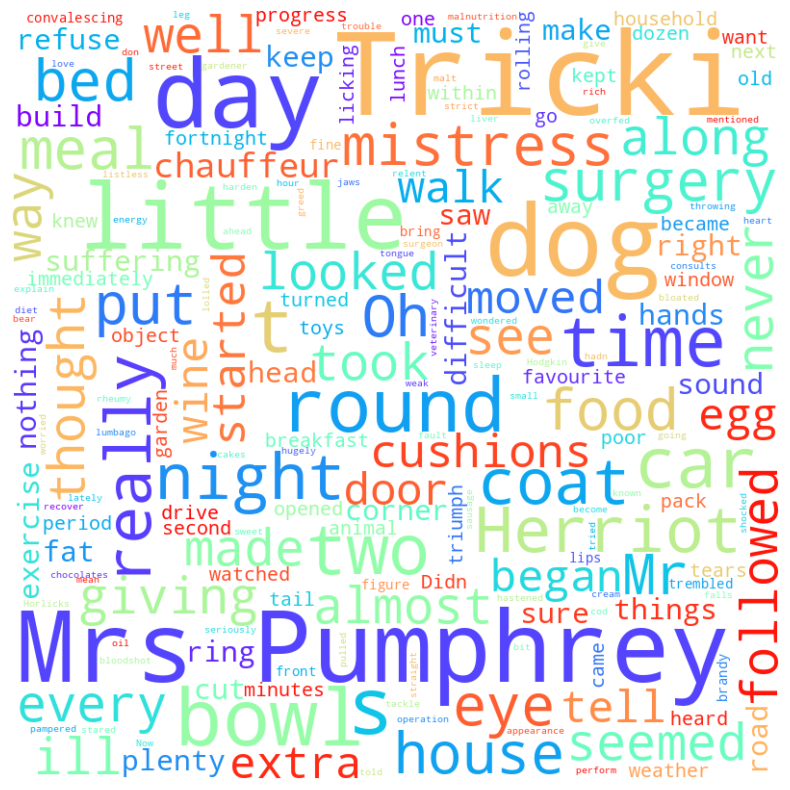

In [64]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Disable axis
plt.show()

In [65]:
# wordcloud_text ='''
# Tricki, a small dog, is pampered and overfed by his rich mistress. he falls seriously ill and his mistress consults a veterinary surgeon. tricki's only fault was greed; he had never been known to refuse food.Tricki, a spoiled dog, is overfed by his rich owner and becomes very sick. The vet, Mr. Herriot, takes Tricki to his clinic to help him recover. Tricki lives with the other dogs at the clinic and gets lots of exercise, which helps him lose weight and become healthy again. His owner, Mrs. Pumphrey, is very worried about him and keeps sending him gifts and treats, but Mr. Herriot makes sure Tricki stays on a healthy diet. In the end, Tricki is healthy and happy, and Mrs. Pumphrey is relieved and grateful.'''

In [68]:
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    colormap='rainbow',  # Using a rainbow colormap for vibrant colors
    max_words=200,
    # mask=mask,  # Applying the shape mask
    contour_width=0,
    contour_color='black',
    font_path=None,  # You can specify a fun font if you have one, otherwise, it uses the default
    stopwords=STOPWORDS,
    max_font_size=120,  # Larger font size for key words
    random_state=42
).generate(summary_bart_transformer)

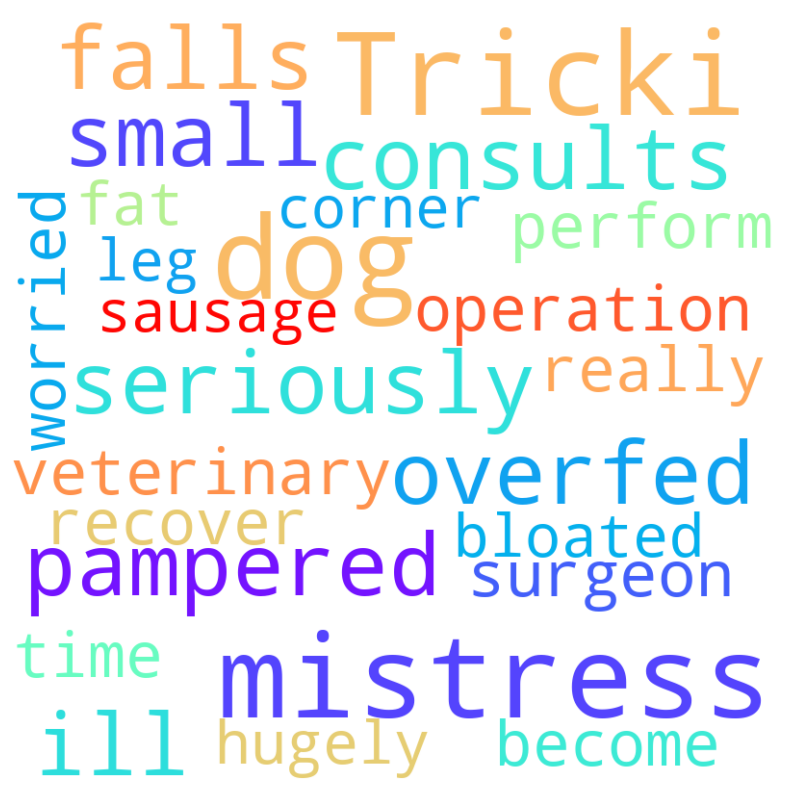

In [69]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Disable axis
plt.show()